In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [16]:
file = 'Scraped_data.csv'

In [17]:
df=pd.read_csv(file)

In [18]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Elite i20,NaN,2019,48693,Petrol,Manual,First,0,0,0,0,0,602000
1,Tata NEXON,NaN,2018,95230,Petrol,Manual,First,0,0,0,0,0,608000
2,Hyundai Creta,NaN,2016,49436,Petrol,Manual,Second,0,0,0,0,0,797000
3,Renault Kwid,NaN,2017,72956,Petrol,Manual,Second,0,0,0,0,0,311000
4,HYUNDAI ELITE I20,NaN,2017,50636,Petrol,Manual,Second,0,0,0,0,0,587000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Jeep Compass,NaN,2017,47664,Diesel,Manual,Second,0,0,0,0,0,1087000
15836,Volkswagen Polo,NaN,2015,77234,Petrol,Manual,First,0,0,0,0,0,394000
15837,HYUNDAI I10,NaN,2010,76641,Petrol,Manual,Second,0,0,0,0,0,183000
15838,Hyundai Verna,NaN,2018,31877,Petrol,Manual,First,0,0,0,0,0,644000


In [19]:
df.shape

(15840, 13)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               15840 non-null  object 
 1   Location           0 non-null      float64
 2   Year               15840 non-null  int64  
 3   Kilometers_Driven  15840 non-null  int64  
 4   Fuel_Type          15840 non-null  object 
 5   Transmission       15840 non-null  object 
 6   Owner_Type         15840 non-null  object 
 7   Mileage            15840 non-null  int64  
 8   Engine             15840 non-null  int64  
 9   Power              15840 non-null  int64  
 10  Seats              15840 non-null  int64  
 11  New_Price          15840 non-null  int64  
 12  Price              15840 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.6+ MB


In [21]:
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '').replace('km/kg', '')).astype(float)



df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '')).astype(float)

df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '').replace('null ', '0')).astype(float)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Elite i20,NaN,2019,48693,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,602000
1,Tata NEXON,NaN,2018,95230,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,608000
2,Hyundai Creta,NaN,2016,49436,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,797000
3,Renault Kwid,NaN,2017,72956,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,311000
4,HYUNDAI ELITE I20,NaN,2017,50636,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,587000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Jeep Compass,NaN,2017,47664,Diesel,Manual,Second,0.0000,0.0000,0.0000,0,0,1087000
15836,Volkswagen Polo,NaN,2015,77234,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,394000
15837,HYUNDAI I10,NaN,2010,76641,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,183000
15838,Hyundai Verna,NaN,2018,31877,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,644000


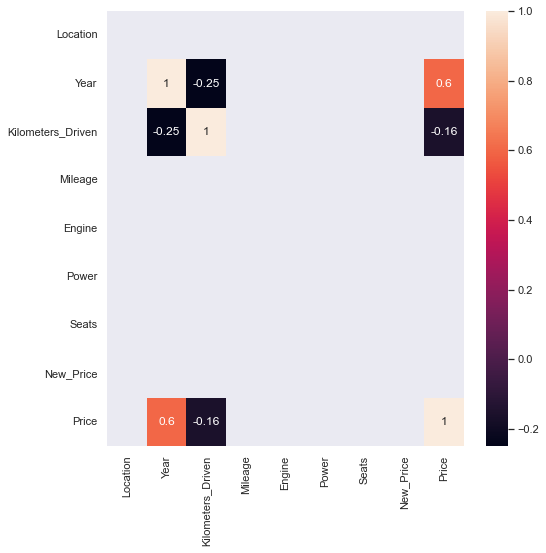

In [22]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [23]:
# sns.heatmap(df1.corr(), annot = True)
# plt.show()

In [24]:
df=df.drop(["Location"], axis='columns')

In [25]:
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Elite i20,2019,48693,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,602000
1,Tata NEXON,2018,95230,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,608000
2,Hyundai Creta,2016,49436,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,797000
3,Renault Kwid,2017,72956,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,311000
4,HYUNDAI ELITE I20,2017,50636,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,587000
...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Jeep Compass,2017,47664,Diesel,Manual,Second,0.0000,0.0000,0.0000,0,0,1087000
15836,Volkswagen Polo,2015,77234,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,394000
15837,HYUNDAI I10,2010,76641,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,0,183000
15838,Hyundai Verna,2018,31877,Petrol,Manual,First,0.0000,0.0000,0.0000,0,0,644000


In [26]:
df.isna()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15835,False,False,False,False,False,False,False,False,False,False,False,False
15836,False,False,False,False,False,False,False,False,False,False,False,False
15837,False,False,False,False,False,False,False,False,False,False,False,False
15838,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df=df.drop("New_Price", axis=1)

In [28]:

df.isnull()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
15835,False,False,False,False,False,False,False,False,False,False,False
15836,False,False,False,False,False,False,False,False,False,False,False
15837,False,False,False,False,False,False,False,False,False,False,False
15838,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.dtypes

Name                 object 
Year                 int64  
Kilometers_Driven    int64  
Fuel_Type            object 
Transmission         object 
Owner_Type           object 
Mileage              float64
Engine               float64
Power                float64
Seats                int64  
Price                int64  
dtype: object

In [30]:

#value ranges from 5 to 15 L..

In [31]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

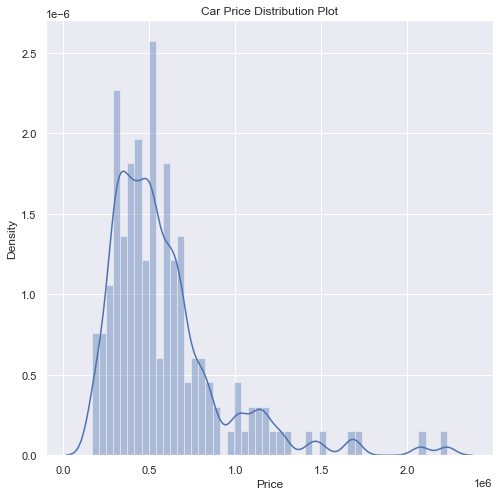

In [32]:
# # Visualizing the different car names available

# plt.rcParams['figure.figsize'] = [15,8]
# ax=df['Name'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
# # ax.set_text('CarName')
# plt.xlabel("Names of the Car",fontweight = 'bold')
# plt.ylabel("Count of Cars",fontweight = 'bold')

plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['Price'])

In [33]:
# plt.figure(figsize=(20, 15))
# plt.subplot(3,3,1)
# sns.boxplot(x = 'Transmission', y = 'Price', data = df)
# plt.subplot(3,3,2)
# sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df)
# plt.subplot(3,3,3)
# sns.boxplot(x = 'Owner_Type', y = 'Price', data = df)


# plt.show()

In [34]:
scaler = preprocessing.StandardScaler()

df_num  = scaler.fit_transform(df_num )
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai Elite i20,2019,48693,Petrol,Manual,First,0.0000,0.0000,0.0000,0,602000
1,Tata NEXON,2018,95230,Petrol,Manual,First,0.0000,0.0000,0.0000,0,608000
2,Hyundai Creta,2016,49436,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,797000
3,Renault Kwid,2017,72956,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,311000
4,HYUNDAI ELITE I20,2017,50636,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,587000
...,...,...,...,...,...,...,...,...,...,...,...
15835,Jeep Compass,2017,47664,Diesel,Manual,Second,0.0000,0.0000,0.0000,0,1087000
15836,Volkswagen Polo,2015,77234,Petrol,Manual,First,0.0000,0.0000,0.0000,0,394000
15837,HYUNDAI I10,2010,76641,Petrol,Manual,Second,0.0000,0.0000,0.0000,0,183000
15838,Hyundai Verna,2018,31877,Petrol,Manual,First,0.0000,0.0000,0.0000,0,644000


In [35]:
# sig_cat_col = ['Name', 'Fuel_Type','Transmission','Owner_Type']

In [36]:
# df1=df
# df1

In [37]:
# dummies = pd.get_dummies(df1[sig_cat_col])
# dummies.shape

In [38]:
# dummies = pd.get_dummies(df1[sig_cat_col], drop_first = True)
# dummies.shape

In [39]:
# df1 = pd.concat([df1, dummies], axis = 1)

In [40]:
# df1.drop( sig_cat_col, axis = 1, inplace = True)
# df1.shape

In [41]:
# df=df.drop("New_Price", axis=1)
# df=df.drop("P[rice", axis=1)
# df

# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df = dummies('Fuel_Type',df)
df = dummies('Transmission',df)
df = dummies('Owner_Type',df)

In [42]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [43]:
# scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_vars = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power','Seats','Price']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [44]:
np.random.seed(0)

In [45]:

# df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
df

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Diesel,Petrol,Manual,Second,Third
0,Hyundai Elite i20,0.7593,-0.0224,0.0000,0.0000,0.0000,0.0000,0.0396,0,1,1,0,0
1,Tata NEXON,0.4421,1.7656,0.0000,0.0000,0.0000,0.0000,0.0572,0,1,1,0,0
2,Hyundai Creta,-0.1923,0.0062,0.0000,0.0000,0.0000,0.0000,0.6121,0,1,1,1,0
3,Renault Kwid,0.1249,0.9098,0.0000,0.0000,0.0000,0.0000,-0.8148,0,1,1,1,0
4,HYUNDAI ELITE I20,0.1249,0.0523,0.0000,0.0000,0.0000,0.0000,-0.0044,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,Jeep Compass,0.1249,-0.0619,0.0000,0.0000,0.0000,0.0000,1.4636,1,0,1,1,0
15836,Volkswagen Polo,-0.5095,1.0742,0.0000,0.0000,0.0000,0.0000,-0.5711,0,1,1,0,0
15837,HYUNDAI I10,-2.0955,1.0514,0.0000,0.0000,0.0000,0.0000,-1.1906,0,1,1,1,0
15838,Hyundai Verna,0.4421,-0.6685,0.0000,0.0000,0.0000,0.0000,0.1629,0,1,1,0,0


In [47]:

# Define the features and target variable
# Name	Year	Kilometers_Driven	Fuel_Type	Transmission	Owner_Type	Mileage	Engine	Power	Seats	Price
X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']]
y = df['Price']

# Convert categorical variables to numerical using one-hot encoding
# X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission','Owner_Type'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [48]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.590187765551898
R-squared: 0.3685858346300559


In [49]:
X = df.drop("Price", axis=1)
y = df["Price"]




In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

In [51]:
X_train.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third
3818,Maruti WAGON R 1.0,-1.7783,0.8898,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0
10749,Maruti Swift,0.4421,-1.2502,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
513,VOLKSWAGEN POLO,-0.5095,0.5928,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
12879,HONDA WR-V,1.3937,-0.4899,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13392,Hyundai VENUE,1.3937,-1.3790,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0


In [52]:
# # Apply scaler() to all the columns except the 'dummy' variables
# import warnings
# warnings.filterwarnings("ignore")

# df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [53]:
X_train.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third
3818,Maruti WAGON R 1.0,-1.7783,0.8898,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0
10749,Maruti Swift,0.4421,-1.2502,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
513,VOLKSWAGEN POLO,-0.5095,0.5928,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
12879,HONDA WR-V,1.3937,-0.4899,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13392,Hyundai VENUE,1.3937,-1.3790,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0


In [54]:
# y_train = df_train.pop('Price')
# X_train = df_train

In [55]:
# X_train = X_train[['Year', 'Engine', 'Power']]

In [56]:
# X_train.dropna()

In [57]:
X_train[X_train.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third
3818,Maruti WAGON R 1.0,-1.7783,0.8898,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0
10749,Maruti Swift,0.4421,-1.2502,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
513,VOLKSWAGEN POLO,-0.5095,0.5928,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
12879,HONDA WR-V,1.3937,-0.4899,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13392,Hyundai VENUE,1.3937,-1.3790,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11798,Skoda Rapid,0.4421,-1.5973,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13896,Volkswagen Polo,-0.5095,1.0742,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
6637,Hyundai Eon,-0.5095,-0.6364,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
2575,Renault KWID,1.0765,-1.8447,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0


In [58]:
# # Add a constant
# X_train_3c = sm.add_constant(X_train)

# # Create a third fitted model
# lr_3 = sm.OLS(y_train, X_train_3c).fit()
X_train=X_train.drop("Name", axis='columns')
X_test=X_test.drop("Name", axis="columns")

In [59]:

X_test


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third
13702,0.4421,1.5677,0.0000,0.0000,0.0000,0.0000,1,0,0,0,0
6689,-2.0955,-0.0631,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
8855,0.1249,1.3486,0.0000,0.0000,0.0000,0.0000,1,0,1,1,0
1177,-0.1923,0.7201,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
4347,-1.1439,-0.0971,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12487,0.4421,-0.0826,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
9901,-0.1923,-0.3230,0.0000,0.0000,0.0000,0.0000,0,1,0,1,0
8875,0.1249,1.3486,0.0000,0.0000,0.0000,0.0000,1,0,1,1,0
4203,-0.1923,-0.6631,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0


In [60]:

X_train

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third
3818,-1.7783,0.8898,0.0000,0.0000,0.0000,0.0000,0,0,1,0,0
10749,0.4421,-1.2502,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
513,-0.5095,0.5928,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
12879,1.3937,-0.4899,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13392,1.3937,-1.3790,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11798,0.4421,-1.5973,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
13896,-0.5095,1.0742,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0
6637,-0.5095,-0.6364,0.0000,0.0000,0.0000,0.0000,0,1,1,1,0
2575,1.0765,-1.8447,0.0000,0.0000,0.0000,0.0000,0,1,1,0,0


In [61]:
y_test

13702   0.3126 
6689    -1.2229
8855    -0.1189
1177    -0.2628
4347    -0.1865
          ...  
12487   0.2598 
9901    -0.8970
8875    -0.1189
4203    -0.8206
499     -0.5652
Name: Price, Length: 3168, dtype: float64

In [62]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)
y_pred=xgb_model.predict(X_test)
# y_test['predictions'] = xgb_model.predict(X_test)
# y_test.to_csv('submission.csv')
# preds=xgb_model.predict(X_test)
# accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
# print("accuracy: %f" % (accuracy))

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
regr = AdaBoostRegressor(random_state=20, n_estimators=100)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.6065236612840795

In [67]:
# save the model to disk
import pickle
filename = 'part1_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [68]:
data1=pd.read_csv(r'test_data.csv')

In [69]:
# Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print("Train Accuracy : ", result)

Train Accuracy :  0.9999998399384777


In [70]:
# Loading the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Test Accuracy : ", result)

Test Accuracy :  0.9999998248358186


In [71]:
model=pickle.load(open(filename,'rb'))
df_test = pd.read_csv('test_data.csv')
df_test
# df_test['Price']=model.predict(df_test)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Mahindra XUV500 W6 2WD,Kochi,2017,41290,Diesel,Manual,Second,16.0 kmpl,2179 CC,140 bhp,7.0000,NaN
1,BMW 5 Series 520d Luxury Line,Delhi,2013,65000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0000,67.87 Lakh
2,Toyota Corolla Altis 1.8 G,Bangalore,2016,16471,Petrol,Manual,Second,14.28 kmpl,1798 CC,138.03 bhp,5.0000,20.48 Lakh
3,Hyundai i20 Asta 1.4 CRDi,Pune,2015,54339,Diesel,Manual,Second,22.54 kmpl,1396 CC,88.73 bhp,5.0000,NaN
4,Mahindra KUV 100 mFALCON G80 K2,Hyderabad,2016,24025,Petrol,Manual,First,18.15 kmpl,1198 CC,82 bhp,6.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0000,7.88 Lakh
2516,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0000,NaN
2517,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0000,NaN
2518,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0000,NaN


In [72]:
df_test = dummies('Fuel_Type',df_test)
df_test = dummies('Transmission',df_test)
df_test = dummies('Owner_Type',df_test)

In [73]:
name=df_test["Name"]
df_test=df_test.drop(['Name', 'Location','New_Price', 'Electric'], axis="columns")

In [74]:
df_test['Mileage'] = df_test['Mileage'].apply(lambda x: str(x).replace('kmpl', '').replace('km/kg', '')).astype(float)



df_test['Engine'] = df_test['Engine'].apply(lambda x: str(x).replace('CC', '')).astype(float)

df_test['Power'] = df_test['Power'].apply(lambda x: str(x).replace('bhp', '').replace('null ', '0')).astype(float)

df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2017,41290,16.0000,2179.0000,140.0000,7.0000,1,0,0,1,0,1,0
1,2013,65000,22.4800,1995.0000,190.0000,5.0000,1,0,0,0,0,0,0
2,2016,16471,14.2800,1798.0000,138.0300,5.0000,0,0,1,1,0,1,0
3,2015,54339,22.5400,1396.0000,88.7300,5.0000,1,0,0,1,0,1,0
4,2016,24025,18.1500,1198.0000,82.0000,6.0000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2014,27365,28.4000,1248.0000,74.0000,5.0000,1,0,0,1,0,0,0
2516,2015,100000,24.4000,1120.0000,71.0000,5.0000,1,0,0,1,0,0,0
2517,2012,55000,14.0000,2498.0000,112.0000,8.0000,1,0,0,1,0,1,0
2518,2013,46000,18.9000,998.0000,67.1000,5.0000,0,0,1,1,0,0,0


In [76]:
df_test=df_test.drop(["LPG", "Fourth & Above"], axis="columns")

In [77]:
df_test['Price']=model.predict(df_test)

In [78]:
name

0       Mahindra XUV500 W6 2WD         
1       BMW 5 Series 520d Luxury Line  
2       Toyota Corolla Altis 1.8 G     
3       Hyundai i20 Asta 1.4 CRDi      
4       Mahindra KUV 100 mFALCON G80 K2
                     ...               
2515    Maruti Swift VDI               
2516    Hyundai Xcent 1.1 CRDi S       
2517    Mahindra Xylo D4 BSIV          
2518    Maruti Wagon R VXI             
2519    Chevrolet Beat Diesel          
Name: Name, Length: 2520, dtype: object

In [79]:
df_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Diesel,Petrol,Manual,Second,Third,Price
0,2017,41290,16.0000,2179.0000,140.0000,7.0000,1,0,1,1,0,1.5111
1,2013,65000,22.4800,1995.0000,190.0000,5.0000,1,0,0,0,0,1.5604
2,2016,16471,14.2800,1798.0000,138.0300,5.0000,0,1,1,1,0,0.1462
3,2015,54339,22.5400,1396.0000,88.7300,5.0000,1,0,1,1,0,1.5111
4,2016,24025,18.1500,1198.0000,82.0000,6.0000,0,1,1,0,0,-0.1226
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2014,27365,28.4000,1248.0000,74.0000,5.0000,1,0,1,0,0,1.5322
2516,2015,100000,24.4000,1120.0000,71.0000,5.0000,1,0,1,0,0,1.5322
2517,2012,55000,14.0000,2498.0000,112.0000,8.0000,1,0,1,1,0,1.5111
2518,2013,46000,18.9000,998.0000,67.1000,5.0000,0,1,1,0,0,-0.1226


In [81]:
df_sub = df_test.drop(columns=["Year", "Kilometers_Driven", "Mileage","Engine","Power","Seats","Diesel","Petrol","Manual","Second","Third"], axis = 1)
df_sub["Name"]=name

In [84]:
df_sub

,Price,Name
0,1.5111,Mahindra XUV500 W6 2WD
1,1.5604,BMW 5 Series 520d Luxury Line
2,0.1462,Toyota Corolla Altis 1.8 G
3,1.5111,Hyundai i20 Asta 1.4 CRDi
4,-0.1226,Mahindra KUV 100 mFALCON G80 K2
...,...,...
2515,1.5322,Maruti Swift VDI
2516,1.5322,Hyundai Xcent 1.1 CRDi S
2517,1.5111,Mahindra Xylo D4 BSIV
2518,-0.1226,Maruti Wagon R VXI


In [85]:
df_sub.to_csv("part2_prediction.csv", index=False)